In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [80]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/Clean Data/realgmncaa2.csv')

In [81]:
df.head()

,BPG,TOV,3PM,3PA,DRB,PPG,Games Played,FGM,PF,RPG,FT%,FGA,SPG,Name,FTA,Team,FG%,FTM,MPG,APG,ORB,3P%,Year
0,0.3,4.0,3.5,8.9,5.0,29.3,28,8.1,2.8,6.9,0.841,20.5,1.3,Ruben Douglas,11.2,UNM,0.397,9.5,35.1,2.2,1.9,0.395,2003
1,0.5,2.2,2.9,6.6,4.7,27.4,30,8.6,2.0,6.6,0.844,18.7,1.4,Henry Domercant,8.7,EIU,0.460,7.4,33.7,2.7,1.9,0.434,2003
2,0.2,4.4,4.1,10.5,2.7,27.4,29,8.8,2.1,3.6,0.853,22.1,1.6,Kee-Kee Clark,6.7,SPC,0.396,5.7,38.2,4.6,0.9,0.392,2003
3,0.2,3.8,4.2,12.0,3.0,26.3,29,8.8,2.5,3.8,0.753,23.3,1.5,Michael Watson,6.0,UMKC,0.377,4.5,38.8,3.9,0.8,0.350,2003
4,0.2,3.6,2.6,6.8,2.6,26.1,28,8.4,3.1,3.9,0.745,18.5,1.4,Mike Helms,9.1,OU,0.452,6.8,34.5,1.9,1.2,0.379,2003


In [82]:
df['Name'] = df['Name'].apply(lambda x: x.lower().title())

** We need to only have players who are in the target index**

We need to make sure we are matching the right players with the target, so we need the name of their college
==

5th Year Target
==

In [5]:
five = pd.read_csv('/Users/mattlee/GA-Capstone-Project/avg5metrics.csv')

In [12]:
five.shape

(598, 24)

In [6]:
names = list(five['Name'].unique())

In [83]:
df1 = df.loc[df['Name'].isin(names)].copy()

In [84]:
df1.shape

(764, 23)

In [85]:
df1.loc[df1['Name'] == 'Al Horford']

,BPG,TOV,3PM,3PA,DRB,PPG,Games Played,FGM,PF,RPG,FT%,FGA,SPG,Name,FTA,Team,FG%,FTM,MPG,APG,ORB,3P%,Year
10625,1.6,0.9,0.0,0.0,4.2,5.4,32,1.9,2.4,6.4,0.582,3.9,0.8,Al Horford,3.0,UF,0.480,1.7,22.8,0.9,2.2,0.0,2005
13846,1.7,1.9,0.0,0.1,5.4,11.1,39,4.5,2.4,7.5,0.611,7.3,1.0,Al Horford,3.6,UF,0.608,2.2,25.9,1.9,2.2,0.0,2006
18010,1.8,1.8,0.0,0.1,6.9,13.1,38,4.9,2.5,9.4,0.644,8.0,0.7,Al Horford,5.3,UF,0.608,3.4,27.8,2.1,2.5,0.0,2007


**We only have 630 players that are captured in this dataset (that played college basketball, omitting highschool, international and undrafted players). We will attempt to model with these individual college statistics only, and follow the method of the target variable (picking the last year of a college player's career, or averaging all the years)**

**There are players with the same name...lets just get their last year first**

In [86]:
df2 = pd.DataFrame(df1.groupby(['Name','Team'])['Year'].max()).reset_index()

In [87]:
df2.head()

,Name,Team,Year
0,A.J. Price,UConn,2009
1,A.J. Price,UTSA,2013
2,Aaron Gray,PITT,2007
3,Al Horford,UF,2007
4,Al-Farouq Aminu,WF,2010


In [88]:
df2 = pd.merge(df2,df1[['Name','Year','Team','Games Played','MPG','FGM','FGA','FG%','FTM','FTA','FT%','3PM','3PA',
                         '3P%','PPG','ORB','DRB','RPG','APG','SPG','BPG','TOV','PF']],
                on = ['Name','Team','Year'],how = 'left')

In [89]:
df2.head()

,Name,Team,Year,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,PPG,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,A.J. Price,UConn,2009,35,31.8,4.7,11.6,0.408,2.6,3.6,0.721,2.3,5.7,0.402,14.4,0.6,2.8,3.4,4.6,0.7,0.0,2.6,1.2
1,A.J. Price,UTSA,2013,15,10.0,0.3,0.8,0.333,0.0,0.0,0.000,0.3,0.7,0.400,0.8,0.1,0.2,0.3,0.5,0.2,0.0,1.1,0.9
2,Aaron Gray,PITT,2007,36,28.2,6.0,10.7,0.565,2.7,4.9,0.548,0.0,0.0,0.000,14.7,3.5,6.5,10.1,1.8,0.4,1.8,1.6,2.7
3,Al Horford,UF,2007,38,27.8,4.9,8.0,0.608,3.4,5.3,0.644,0.0,0.1,0.000,13.1,2.5,6.9,9.4,2.1,0.7,1.8,1.8,2.5
4,Al-Farouq Aminu,WF,2010,31,31.3,5.1,11.5,0.447,4.3,6.1,0.698,0.6,2.0,0.273,15.1,4.1,6.1,10.2,1.3,1.4,1.4,3.0,2.8


In [90]:
dfmin = pd.DataFrame(df1.groupby(['Name','Team'])['Year'].min()).reset_index()

In [91]:
dfmin.head()

,Name,Team,Year
0,A.J. Price,UConn,2007
1,A.J. Price,UTSA,2013
2,Aaron Gray,PITT,2004
3,Al Horford,UF,2005
4,Al-Farouq Aminu,WF,2009


In [92]:
dfmin['First Year'] = dfmin['Year']

In [93]:
df3 = pd.merge(df2,dfmin[['Name','Team','Year','First Year']],on = ['Name','Team'], how = 'left')

In [94]:
df3.head()

,Name,Team,Year_x,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,PPG,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year_y,First Year
0,A.J. Price,UConn,2009,35,31.8,4.7,11.6,0.408,2.6,3.6,0.721,2.3,5.7,0.402,14.4,0.6,2.8,3.4,4.6,0.7,0.0,2.6,1.2,2007,2007
1,A.J. Price,UTSA,2013,15,10.0,0.3,0.8,0.333,0.0,0.0,0.000,0.3,0.7,0.400,0.8,0.1,0.2,0.3,0.5,0.2,0.0,1.1,0.9,2013,2013
2,Aaron Gray,PITT,2007,36,28.2,6.0,10.7,0.565,2.7,4.9,0.548,0.0,0.0,0.000,14.7,3.5,6.5,10.1,1.8,0.4,1.8,1.6,2.7,2004,2004
3,Al Horford,UF,2007,38,27.8,4.9,8.0,0.608,3.4,5.3,0.644,0.0,0.1,0.000,13.1,2.5,6.9,9.4,2.1,0.7,1.8,1.8,2.5,2005,2005
4,Al-Farouq Aminu,WF,2010,31,31.3,5.1,11.5,0.447,4.3,6.1,0.698,0.6,2.0,0.273,15.1,4.1,6.1,10.2,1.3,1.4,1.4,3.0,2.8,2009,2009


In [95]:
df3.drop('Year_y',axis = 1, inplace = True)

In [96]:
df3['Year in College'] = df3['Year_x'] - df3['First Year']

In [97]:
df3.head()

,Name,Team,Year_x,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,PPG,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,First Year,Year in College
0,A.J. Price,UConn,2009,35,31.8,4.7,11.6,0.408,2.6,3.6,0.721,2.3,5.7,0.402,14.4,0.6,2.8,3.4,4.6,0.7,0.0,2.6,1.2,2007,2
1,A.J. Price,UTSA,2013,15,10.0,0.3,0.8,0.333,0.0,0.0,0.000,0.3,0.7,0.400,0.8,0.1,0.2,0.3,0.5,0.2,0.0,1.1,0.9,2013,0
2,Aaron Gray,PITT,2007,36,28.2,6.0,10.7,0.565,2.7,4.9,0.548,0.0,0.0,0.000,14.7,3.5,6.5,10.1,1.8,0.4,1.8,1.6,2.7,2004,3
3,Al Horford,UF,2007,38,27.8,4.9,8.0,0.608,3.4,5.3,0.644,0.0,0.1,0.000,13.1,2.5,6.9,9.4,2.1,0.7,1.8,1.8,2.5,2005,2
4,Al-Farouq Aminu,WF,2010,31,31.3,5.1,11.5,0.447,4.3,6.1,0.698,0.6,2.0,0.273,15.1,4.1,6.1,10.2,1.3,1.4,1.4,3.0,2.8,2009,1


In [98]:
df3.loc[df3['Year in College'] == 0]

,Name,Team,Year_x,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,PPG,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,First Year,Year in College
1,A.J. Price,UTSA,2013,15,10.0,0.3,0.8,0.333,0.0,0.0,0.000,0.3,0.7,0.400,0.8,0.1,0.2,0.3,0.5,0.2,0.0,1.1,0.9,2013,0
7,Andre Drummond,UConn,2012,34,28.5,4.9,9.1,0.538,0.8,2.8,0.295,0.0,0.1,0.000,10.6,3.6,4.5,8.0,0.5,0.9,2.9,1.6,2.3,2012,0
14,Anthony Davis,UK,2012,40,32.0,5.4,8.6,0.623,3.7,5.2,0.709,0.1,0.5,0.150,14.5,3.0,7.6,10.6,1.3,1.4,4.8,1.0,2.0,2012,0
15,Anthony Davis,UMES,2005,26,14.2,0.8,2.9,0.280,0.5,0.8,0.636,0.3,1.3,0.211,2.4,0.5,0.7,1.2,0.8,0.3,0.1,1.4,0.9,2005,0
17,Anthony Johnson,ETSU,2011,6,3.5,0.2,1.6,0.111,0.4,0.7,0.500,0.0,1.1,0.000,0.7,0.2,0.4,0.5,0.5,0.0,0.0,0.2,0.4,2011,0
19,Anthony Johnson,NIU,2015,27,22.8,4.0,9.2,0.434,1.8,2.6,0.701,1.3,3.5,0.374,11.1,0.7,1.5,2.2,1.0,0.4,0.0,1.1,1.4,2015,0
23,Anthony Johnson,USL,2003,27,27.1,4.8,9.4,0.509,3.4,4.9,0.693,0.9,3.3,0.280,13.9,1.8,3.2,5.1,1.3,0.9,0.6,2.0,1.9,2003,0
24,Anthony Miller,CIT,2004,14,15.6,1.7,4.5,0.379,0.8,1.3,0.588,0.7,2.8,0.250,4.6,1.0,1.5,2.5,0.9,0.8,0.9,1.2,1.7,2004,0
25,Anthony Randolph,LSU,2008,31,32.8,5.8,12.5,0.464,3.7,5.3,0.693,0.1,0.6,0.105,15.3,2.7,5.6,8.4,1.2,1.1,2.2,2.9,2.7,2008,0
29,Austin Rivers,DUKE,2012,34,33.2,5.1,11.8,0.433,3.5,5.4,0.658,1.7,4.7,0.365,15.5,0.6,2.8,3.4,2.1,1.0,0.0,2.3,2.2,2012,0


(array([ 99.,   0.,  96.,   0.,   0.,  72.,   0.,  62.,   0.,   2.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

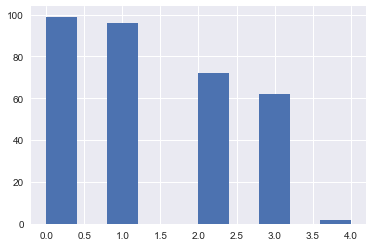

In [99]:
plt.hist(df3['Year in College'])

In [100]:
df3['Year in College'].value_counts()

0    99
1    96
2    72
3    62
4     2
Name: Year in College, dtype: int64

In [101]:
df3.loc[df3['Year in College'] == 4]

,Name,Team,Year_x,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,PPG,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,First Year,Year in College
220,Marcus Thornton,UGA,2015,31,29.2,4.4,9.1,0.480,3.4,4.8,0.691,0.3,1.0,0.3,12.4,1.7,5.6,7.4,1.0,0.7,1.1,1.5,3.1,2011,4
244,Mike Scott,UVA,2012,32,31.2,7.5,13.3,0.563,4.8,6.0,0.808,0.2,0.7,0.3,20.0,2.4,6.8,9.2,1.3,0.7,0.5,2.3,1.9,2008,4


**These two players were able to stay an extra year due to being granted medical red shirts (season ending injury), so we will reclassify them to Seniors.**

In [104]:
df3.loc[(df3['Name'] == 'Marcus Thornton') & (df3['Team'] == 'UGA'), 'Year in College'] = 3
df3.loc[(df3['Name'] == 'Mike Scott') & (df3['Team'] == 'UVA'), 'Year in College'] = 3

In [105]:
df3['Freshman'] = df3['Year in College'].apply(lambda x: 1 if x == 0 else 0)
df3['Sophomore'] = df3['Year in College'].apply(lambda x: 1 if x == 1 else 0)
df3['Junior'] = df3['Year in College'].apply(lambda x: 1 if x == 2 else 0)
df3['Senior'] = df3['Year in College'].apply(lambda x: 1 if x == 3 else 0)

In [106]:
df3.to_csv('collegelastyear.csv', index = False)

In [136]:
df3.shape

(331, 29)

In [755]:
df4 = pd.merge(df3,br[['Year','Name','Team','NBATeam','CollegeName','Age at Draft','Weight at Draft',
                        'Height Inches']], on = ['Name','Team'], how = 'left')

In [757]:
df4 = df4.loc[df4['CollegeName'].notnull()].copy()

In [760]:
df4.shape

(206, 35)

**Now we need to join this dataframe back with our target dataframe, matching player and college**

Average 5 Years Target (I will be using this)
==

In [651]:
df1.loc[df1['Name'] == 'Derrick Rose']

,BPG,TOV,3PM,3PA,DRB,PPG,Games Played,FGM,PF,RPG,FT%,FGA,SPG,Name,FTA,Team,FG%,FTM,MPG,APG,ORB,3P%,Year


In [124]:
new = df1.groupby(['Name','Team'], as_index = False)['PPG'].mean()

**Here we have a dataframe of players grouped by their name and school, and the average of PPG over the course of their college career**

In [125]:
new1 = pd.concat([new,
                df1.groupby(['Name','Team'], as_index = False)['Games Played'].mean()['Games Played'],
                df1.groupby(['Name','Team'], as_index = False)['MPG'].mean()['MPG'],
                df1.groupby(['Name','Team'], as_index = False)['FGM'].mean()['FGM'],
                df1.groupby(['Name','Team'], as_index = False)['FGA'].mean()['FGA'],
                df1.groupby(['Name','Team'], as_index = False)['FG%'].mean()['FG%'],
                df1.groupby(['Name','Team'], as_index = False)['FTM'].mean()['FTM'],
                df1.groupby(['Name','Team'], as_index = False)['FTA'].mean()['FTA'],
                df1.groupby(['Name','Team'], as_index = False)['FT%'].mean()['FT%'],
                df1.groupby(['Name','Team'], as_index = False)['3PM'].mean()['3PM'],
                df1.groupby(['Name','Team'], as_index = False)['3PA'].mean()['3PA'],
                df1.groupby(['Name','Team'], as_index = False)['3P%'].mean()['3P%'],
                df1.groupby(['Name','Team'], as_index = False)['ORB'].mean()['ORB'],
                df1.groupby(['Name','Team'], as_index = False)['DRB'].mean()['DRB'],
                df1.groupby(['Name','Team'], as_index = False)['RPG'].mean()['RPG'],
                df1.groupby(['Name','Team'], as_index = False)['APG'].mean()['APG'],
                df1.groupby(['Name','Team'], as_index = False)['SPG'].mean()['SPG'],
                df1.groupby(['Name','Team'], as_index = False)['BPG'].mean()['BPG'],
                df1.groupby(['Name','Team'], as_index = False)['TOV'].mean()['TOV'],
                df1.groupby(['Name','Team'], as_index = False)['PF'].mean()['PF']
                ], axis = 1)

In [126]:
new1.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.5,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000
1,A.J. Price,UTSA,0.800000,15.000000,10.00,0.300000,0.80,0.333000,0.000000,0.000000,0.000000,0.3,0.700000,0.400,0.100,0.200000,0.300000,0.500000,0.200000,0.000000,1.100000,0.900000
2,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.0,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000
3,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.0,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333
4,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.4,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000


In [135]:
new1.shape

(331, 22)

In [127]:
new1.to_csv('collegeavg.csv', index = False)

In [711]:
br = pd.read_csv('/Users/mattlee/GA-Capstone-Project/generaldf.csv')
br.shape

(1514, 15)

**We can only join the dataframes with accurate player/college matches, we have to do some manual editing**

In [710]:
new1.loc[new1['Name'] == 'Evan Turner', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Byron Mullens', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Daequan Cook', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Jared Sullinger', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Kosta Koufos', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Mike Conley', 'Team'] = 'OHSU'
new1.loc[new1['Name'] == 'Klay Thompson', 'Team'] = 'WSHU'
new1.loc[new1['Name'] == 'Ekpe Udoh', 'Team'] = 'BAY'
new1.loc[new1['Name'] == 'Quincy Acy', 'Team'] = 'BAY'
new1.loc[new1['Name'] == 'Renaldo Balkman', 'Team'] = 'USCAR'
new1.loc[new1['Name'] == 'Hassan Whiteside', 'Team'] = 'MRU'
new1.loc[new1['Name'] == 'Norris Cole', 'Team'] = 'CLSU'
new1.loc[new1['Name'] == 'Alec Burks', 'Team'] = 'UCOL'
new1.loc[new1['Name'] == 'Austin Daye', 'Team'] = 'ZAGS'
new1.loc[new1['Name'] == 'Ronny Turiaf', 'Team'] = 'ZAGS'
new1.loc[new1['Name'] == 'Brandon Roy', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Isaiah Thomas', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Nate Robinson', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Quincy Pondexter', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Spencer Hawes', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Terrence Ross', 'Team'] = 'UWASH'
new1.loc[new1['Name'] == 'Brook Lopez', 'Team'] = 'STFD'
new1.loc[new1['Name'] == 'Landry Fields', 'Team'] = 'STFD'
new1.loc[new1['Name'] == 'Robin Lopez', 'Team'] = 'STFD'
new1.loc[new1['Name'] == 'Gordon Hayward', 'Team'] = 'BUT'
new1.loc[new1['Name'] == 'Shelvin Mack', 'Team'] = 'BUT'
new1.loc[new1['Name'] == 'James Jones', 'Team'] = 'UMIA'
new1.loc[new1['Name'] == 'Kenneth Faried', 'Team'] = 'MHSU'
new1.loc[new1['Name'] == 'Ronnie Brewer', 'Team'] = 'UARK'
new1.loc[new1['Name'] == 'Tobias Harris', 'Team'] = 'UTEN'


In [193]:
new1['Team'].unique()

array(['UConn', 'UTSA', 'PITT', 'UF', 'WF', 'CU', 'RU', 'U of A', 'U of U',
       'C of C', 'STBN', 'APSU', 'ISU', 'UK', 'UMES', 'EIU', 'ETSU', 'FU',
       'NIU', 'PU', 'UM', 'UNC', 'USL', 'CIT', 'LSU', 'TAMU', 'UCLA', 'GU',
       'DUKE', 'UT', 'UNO', 'UW', 'KU', 'U of I', 'SU', 'OSU', 'GT', 'ORU',
       'CMU', 'WKU', 'BC', 'IU', 'WSU', 'BU', 'UNM', 'VILL', 'JAC', 'XAV',
       'SJU', 'USC', 'MU', 'VU', 'BSU', 'RICH', 'JSU', 'CSUF', 'Cal',
       'MSU', 'U of L', 'URI', 'VCU', 'EMU', 'NU', 'IUPUI', 'UMD', 'NAU',
       'NCST', 'ASU', 'UAPB', 'LIB', 'LTU', 'QU', 'SDSU', 'UVA', 'WCU',
       'UB', 'UGA', 'UC', 'CSUN', 'CSU', 'TAMU-CC', 'WSSU', 'ODU', 'UTM',
       'USU', 'UTEP', 'UNR', 'BYU', 'LU', 'CLEM', 'SST', 'WC', 'U of M',
       'NSU', 'TEM', 'UO', 'UNLV', 'W&M', 'GMU', 'LIP', 'ULM', 'STJ',
       'KSU', 'USF', 'EKU', 'FDU', 'TCU', 'UA', 'USMA', 'DUQ', 'EWU',
       'UNL', 'MSMU', 'PROV', 'DAV', 'IC', 'USD', 'PAC', 'AU', 'FSU',
       'UNT', 'STET', 'UDM', 'DEP'], dtype=object

In [706]:
new1.loc[new1['Team'] == 'UT']

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
30,Avery Bradley,UT,10.70,34.0,29.50,4.30,9.9,0.432,1.00,1.80,0.5450,1.20,3.00,0.381,0.90,1.70,2.60,1.90,1.20,0.50,1.40,2.10
57,Cory Joseph,UT,10.20,36.0,32.40,3.70,8.8,0.422,1.40,2.00,0.6990,1.40,3.40,0.413,0.60,2.90,3.50,3.00,1.00,0.30,1.50,1.80
60,D.J. Augustin,UT,16.95,36.5,36.45,5.45,12.3,0.444,4.45,5.50,0.8105,1.60,4.05,0.411,0.60,2.30,2.90,6.20,1.40,0.05,3.05,1.95
65,Daniel Gibson,UT,13.60,34.0,33.00,4.25,10.4,0.411,2.55,3.40,0.7390,2.55,6.50,0.389,0.80,3.20,4.00,3.45,1.55,0.25,2.40,2.40
176,Jordan Hamilton,UT,13.65,35.0,26.05,4.95,11.5,0.425,1.80,2.50,0.6785,2.00,5.35,0.375,1.45,3.95,5.40,1.70,0.75,0.45,1.70,1.45
190,Kevin Durant,UT,24.80,35.0,35.90,8.40,17.8,0.472,5.70,7.00,0.8160,2.20,5.60,0.404,2.90,7.80,10.70,1.30,1.80,1.80,2.70,1.90
203,Lamarcus Aldridge,UT,12.20,26.5,27.95,4.65,7.8,0.616,2.85,4.45,0.6515,0.00,0.00,0.000,3.10,5.65,8.75,0.70,1.20,1.70,1.60,2.65
274,Royal Ivey,UT,8.40,33.0,27.35,3.00,6.5,0.461,2.10,3.05,0.7000,0.40,1.10,0.327,1.15,2.25,3.40,2.90,1.05,0.15,1.40,2.55
300,T.J. Ford,UT,14.40,33.0,33.60,4.60,11.6,0.401,4.60,5.60,0.8240,0.50,2.00,0.265,0.60,3.10,3.70,7.40,1.90,0.10,3.10,2.40
307,Tobias Harris,UT,15.10,34.0,29.20,5.40,11.7,0.460,3.70,4.90,0.7530,0.70,2.20,0.303,1.90,5.20,7.10,1.30,0.70,0.80,1.80,2.00


In [340]:
new1name = list(new1['Name'])
len(new1name)

331

In [712]:
br = br.loc[br['Name'].isin(new1name)].copy()
br.shape

(259, 15)

In [713]:
br = br.loc[br['SeasonYear'] > 2003].copy()
br.shape

(239, 15)

In [714]:
br['CollegeName'] = br['College']

In [709]:
br.loc[br['Name'] == 'P.J. Tucker']

,Year,Pick,Name,NBATeam,Team,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,CollegeName


In [715]:
br.loc[br['College'] == 'Wake Forest University', 'College'] = 'WF'
br.loc[br['College'] == 'University of Virginia', 'College'] = 'UVA'
br.loc[br['College'] == 'University of California', 'College'] = 'Cal'
br.loc[br['College'] == 'University of Kentucky', 'College'] = 'UK'
br.loc[br['College'] == 'Boston College', 'College'] = 'BC'
br.loc[br['College'] == 'University of North Carolina', 'College'] = 'UNC'
br.loc[br['College'] == 'University of Wisconsin', 'College'] = 'UW'
br.loc[br['College'] == 'University of Arizona', 'College'] = 'U of A'
br.loc[br['College'] == 'Colorado State University', 'College'] = 'CSU'
br.loc[br['College'] == 'Syracuse University', 'College'] = 'SU'
br.loc[br['College'] == 'Rider University', 'College'] = 'RU'
br.loc[br['College'] == 'University of Virginia', 'College'] = 'UVA'
br.loc[br['College'] == 'Louisiana State University', 'College'] = 'LSU'
br.loc[br['College'] == 'College of William & Mary', 'College'] = 'W&M'
br.loc[br['College'] == 'California State University Fresno', 'College'] = 'CSUF'
br.loc[br['College'] == 'University of Alabama', 'College'] = 'UA'
br.loc[br['College'] == 'University of Florida', 'College'] = 'UF'
br.loc[br['College'] == 'University of Texas at Austin', 'College'] = 'UT'
br.loc[br['College'] == 'University of Missouri', 'College'] = 'MU'
br.loc[br['College'] == 'University of Connecticut', 'College'] = 'UConn'
br.loc[br['College'] == 'University of Pittsburgh', 'College'] = 'PITT'
br.loc[br['College'] == 'Creighton University', 'College'] = 'CU'
br.loc[br['College'] == 'University of Utah', 'College'] = 'U of U'
br.loc[br['College'] == 'College of Charleston', 'College'] = 'C of C'
br.loc[br['College'] == 'St. Bonaventure University', 'College'] = 'STBN'
br.loc[br['College'] == 'Purdue University', 'College'] = 'PU'
br.loc[br['College'] == 'University of Memphis', 'College'] = 'UM'
br.loc[br['College'] == 'Texas A&M University', 'College'] = 'TAMU'
br.loc[br['College'] == 'University of California Los Angeles', 'College'] = 'UCLA'
br.loc[br['College'] == 'Georgetown University', 'College'] = 'GU'
br.loc[br['College'] == 'Duke University', 'College'] = 'DUKE'
br.loc[br['College'] == 'University of Kansas', 'College'] = 'KU'
br.loc[br['College'] == 'University of Illinois at Urbana-Champaign', 'College'] = 'U of I'
br.loc[br['College'] == 'Georgia Institute of Technology', 'College'] = 'GT'
br.loc[br['College'] == 'Central Michigan University', 'College'] = 'CMU'
br.loc[br['College'] == 'Western Kentucky University', 'College'] = 'WKU'
br.loc[br['College'] == 'Indiana University', 'College'] = 'IU'
br.loc[br['College'] == 'Washington State University', 'College'] = 'WSHU'
br.loc[br['College'] == 'Weber State University', 'College'] = 'WSU'
br.loc[br['College'] == 'Oklahoma State University', 'College'] = 'OSU'
br.loc[br['College'] == 'Ohio State University', 'College'] = 'OHSU'
br.loc[br['College'] == 'University of New Mexico', 'College'] = 'UNM'
br.loc[br['College'] == 'Villanova University', 'College'] = 'VILL'
br.loc[br['College'] == 'Xavier University', 'College'] = 'XAV'
br.loc[br['College'] == 'Saint Joseph\'s University', 'College'] = 'SJU'
br.loc[br['College'] == 'University of South Carolina', 'College'] = 'USCAR'
br.loc[br['College'] == 'University of Southern California', 'College'] = 'USC'
br.loc[br['College'] == 'Marquette University', 'College'] = 'MU'
br.loc[br['College'] == 'Marshall University', 'College'] = 'MRU'
br.loc[br['College'] == 'Vanderbilt University', 'College'] = 'VU'
br.loc[br['College'] == 'University of Richmond', 'College'] = 'RICH'
br.loc[br['College'] == 'Michigan State University', 'College'] = 'MSU'
br.loc[br['College'] == 'University of Louisville', 'College'] = 'U of L'
br.loc[br['College'] == 'Virginia Commonwealth University', 'College'] = 'VCU'
br.loc[br['College'] == 'Indiana University-Purdue University Indianapolis', 'College'] = 'IUPUI'
br.loc[br['College'] == 'University of Maryland', 'College'] = 'UMD'
br.loc[br['College'] == 'North Carolina State University', 'College'] = 'NCST'
br.loc[br['College'] == 'Arizona State University', 'College'] = 'ASU'
br.loc[br['College'] == 'Louisiana Tech University', 'College'] = 'LTU'
br.loc[br['College'] == 'San Diego State University', 'College'] = 'SDSU'
br.loc[br['College'] == 'Western Carolina University', 'College'] = 'WCU'
br.loc[br['College'] == 'University of Georgia', 'College'] = 'UGA'
br.loc[br['College'] == 'University of Cincinnati', 'College'] = 'UC'
br.loc[br['College'] == 'Cleveland State University', 'College'] = 'CLSU'
br.loc[br['College'] == 'University of Nevada Reno', 'College'] = 'UNR'
br.loc[br['College'] == 'Brigham Young University', 'College'] = 'BYU'
br.loc[br['College'] == 'Clemson University', 'College'] = 'CLEM'
br.loc[br['College'] == 'University of Minnesota', 'College'] = 'U of M'
br.loc[br['College'] == 'Norfolk State University', 'College'] = 'NSU'
br.loc[br['College'] == 'Temple University', 'College'] = 'TEM'
br.loc[br['College'] == 'University of Oregon', 'College'] = 'UO'
br.loc[br['College'] == 'University of Nevada Las Vegas', 'College'] = 'UNLV'
br.loc[br['College'] == 'St. John\'s University', 'College'] = 'STJ'
br.loc[br['College'] == 'Kansas State University', 'College'] = 'KSU'
br.loc[br['College'] == 'University of South Florida', 'College'] = 'USF'
br.loc[br['College'] == 'Eastern Washington University', 'College'] = 'EWU'
br.loc[br['College'] == 'Providence College', 'College'] = 'PROV'
br.loc[br['College'] == 'Davidson College', 'College'] = 'DAV'
br.loc[br['College'] == 'Florida State University', 'College'] = 'FSU'
br.loc[br['College'] == 'University of Detroit Mercy', 'College'] = 'UDM'
br.loc[br['College'] == 'DePaul University', 'College'] = 'DEP'
br.loc[br['College'] == 'University of Colorado', 'College'] = 'UCOL'
br.loc[br['College'] == 'Gonzaga University', 'College'] = 'ZAGS'
br.loc[br['College'] == 'University of Washington', 'College'] = 'UWASH'
br.loc[br['College'] == 'Stanford University', 'College'] = 'STFD'
br.loc[br['College'] == 'Baylor University', 'College'] = 'BAY'
br.loc[br['College'] == 'Butler University', 'College'] = 'BUT'
br.loc[br['College'] == 'University of Miami', 'College'] = 'UMIA'
br.loc[br['College'] == 'Morehead State University', 'College'] = 'MHSU'
br.loc[br['College'] == 'University of Arkansas', 'College'] = 'UARK'
br.loc[br['College'] == 'University of Tennessee', 'College'] = 'UTEN'


In [716]:
br.columns = ['Year','Pick','Name','NBATeam','Team','Age at Draft','Weight at Draft','Height at Draft',
             'Country','Position','Date','City','State','Height Inches','SeasonYear','CollegeName']

In [662]:
br.head()

,Year,Pick,Name,NBATeam,Team,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,CollegeName
679,2003,3,Carmelo Anthony,DEN,SU,18.9,233,"6'7.0""",USA,SF,1984-05-29 00:00:00,New York,New York,79,2004,Syracuse University
680,2003,4,Chris Bosh,TOR,GT,19.1,225,"6'11.0""",USA,PF,1984-03-24 00:00:00,Dallas,Texas,83,2004,Georgia Institute of Technology
681,2003,5,Dwyane Wade,MIA,MU,21.2,212,"6'5.0""",USA,SG,1982-01-17 00:00:00,Chicago,Illinois,77,2004,Marquette University
682,2003,6,Chris Kaman,LAC,CMU,20.9,252,"7'0.0""",USA,C,1982-04-28 00:00:00,Wyoming,Michigan,84,2004,Central Michigan University
683,2003,7,Kirk Hinrich,CHI,KU,22.2,186,"6'4.0""",USA,SG,1981-01-02 00:00:00,Sioux City,Iowa,76,2004,University of Kansas


In [725]:
br.loc[br['Name'] == 'Will Barton']

,Year,Pick,Name,NBATeam,Team,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,CollegeName
1253,2012,40,Will Barton,POR,UM,21.3,174,"6'6.0""",USA,SF,1991-01-06 00:00:00,Baltimore,Maryland,78,2013,University of Memphis


In [717]:
new2 = pd.merge(new1,br[['Year','Name','Team','NBATeam','CollegeName','Age at Draft','Weight at Draft',
                        'Height Inches']], on = ['Name','Team'], how = 'left')

**Below are players that have the same name as current NBA players, which is why they have null values for the NBA columns**

In [718]:
new2.loc[new2['CollegeName'].isnull()]

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
1,A.J. Price,UTSA,0.800000,15.000000,10.000000,0.300000,0.800000,0.333000,0.000000,0.000000,0.000000,0.300000,0.700000,0.400000,0.100000,0.200000,0.300000,0.500000,0.200000,0.000000,1.100000,0.900000,NaN,NaN,NaN,NaN,NaN,NaN
6,Amir Johnson,RU,10.000000,30.000000,34.475000,3.325000,8.600000,0.387000,2.075000,3.125000,0.656000,1.225000,3.675000,0.337000,0.425000,3.425000,3.850000,4.925000,1.525000,0.125000,3.225000,2.575000,NaN,NaN,NaN,NaN,NaN,NaN
12,Anthony Davis,APSU,16.233333,30.666667,31.633333,5.866667,14.000000,0.419333,3.133333,4.200000,0.739000,1.166667,4.000000,0.296000,1.700000,4.366667,6.066667,2.900000,1.833333,0.433333,2.366667,2.500000,NaN,NaN,NaN,NaN,NaN,NaN
13,Anthony Davis,ISU,3.850000,18.000000,13.250000,1.050000,2.950000,0.362000,1.350000,1.850000,0.699500,0.400000,1.350000,0.297000,0.750000,1.400000,2.150000,0.450000,0.350000,0.100000,1.050000,1.950000,NaN,NaN,NaN,NaN,NaN,NaN
15,Anthony Davis,UMES,2.400000,26.000000,14.200000,0.800000,2.900000,0.280000,0.500000,0.800000,0.636000,0.300000,1.300000,0.211000,0.500000,0.700000,1.200000,0.800000,0.300000,0.100000,1.400000,0.900000,NaN,NaN,NaN,NaN,NaN,NaN
16,Anthony Johnson,EIU,1.433333,22.000000,6.166667,0.500000,1.200000,0.423000,0.266667,0.433333,0.714667,0.133333,0.400000,0.315667,0.133333,0.733333,0.866667,0.266667,0.100000,0.000000,0.333333,0.733333,NaN,NaN,NaN,NaN,NaN,NaN
17,Anthony Johnson,ETSU,0.700000,6.000000,3.500000,0.200000,1.600000,0.111000,0.400000,0.700000,0.500000,0.000000,1.100000,0.000000,0.200000,0.400000,0.500000,0.500000,0.000000,0.000000,0.200000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN
18,Anthony Johnson,FU,11.275000,29.000000,28.075000,4.525000,8.850000,0.511500,2.250000,3.850000,0.576000,0.000000,0.025000,0.000000,3.400000,4.200000,7.600000,0.650000,1.050000,1.800000,1.650000,2.950000,NaN,NaN,NaN,NaN,NaN,NaN
19,Anthony Johnson,NIU,11.100000,27.000000,22.800000,4.000000,9.200000,0.434000,1.800000,2.600000,0.701000,1.300000,3.500000,0.374000,0.700000,1.500000,2.200000,1.000000,0.400000,0.000000,1.100000,1.400000,NaN,NaN,NaN,NaN,NaN,NaN
20,Anthony Johnson,PU,5.350000,34.000000,16.750000,2.000000,5.350000,0.376500,1.000000,1.700000,0.599000,0.350000,1.400000,0.244500,0.550000,1.950000,2.550000,1.150000,0.300000,0.000000,0.950000,1.650000,NaN,NaN,NaN,NaN,NaN,NaN


In [721]:
new3 = new2.loc[new2['CollegeName'].notnull()].copy()

**Add Derrick Rose in afterwards**

In [722]:
drose = pd.read_csv('/Users/mattlee/GA-Capstone-Project/droseavg5.csv')

In [723]:
new3.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0
2,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0
3,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0
4,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0
5,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0


In [726]:
rose = pd.read_csv('/Users/mattlee/GA-Capstone-Project/generaldf.csv')
rose.loc[rose['Name'] == 'Derrick Rose']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear
974,2008,1,Derrick Rose,CHI,University of Memphis,19.5,196,"6'2.0""",USA,PG,1988-10-04 00:00:00,Chicago,Illinois,74,2009


In [727]:
rose = rose.loc[rose['Name'] == 'Derrick Rose', ['Name','Team','College','Age at Draft','Weight at Draft',
                                                'Height Inches']].copy()

In [738]:
rose

,Name,Team,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
974,Derrick Rose,CHI,University of Memphis,19.5,196,74,UM


In [739]:
rose.columns = ['Name','NBATeam','CollegeName','Age at Draft','Weight at Draft','Height Inches','Team']

In [730]:
rose['Team'] = 'UM'

In [733]:
rosecat = df.loc[df['Name'] == 'Derrick Rose'].copy()

In [741]:
rose1 = pd.merge(rose,rosecat, on = 'Name', how = 'left')

In [745]:
rose1.drop('Team_y',axis = 1, inplace = True)

In [747]:
rose1['Team'] = rose1['Team_x']
rose1.drop('Team_x', axis = 1, inplace = True)

In [748]:
rose1 = rose1[['Name','Team','PPG','Games Played','MPG','FGM','FGA','FG%','FTM','FTA','FT%','3PM','3PA',
              '3P%','ORB','DRB','RPG','APG','SPG','BPG','TOV','PF','Year','NBATeam','CollegeName','Age at Draft',
              'Weight at Draft','Height Inches']].copy()

In [750]:
new4 = pd.concat([new3,rose1])
new4 = new4.reset_index(drop = True)
new4.tail()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
235,Will Barton,UM,15.05,35.0,32.95,5.60,11.85,0.4685,2.75,3.75,0.7240,1.10,3.55,0.3055,1.65,4.70,6.45,2.80,1.45,0.6,2.35,2.15,2012.0,POR,University of Memphis,21.3,174.0,78.0
236,Willie Green,UDM,23.90,30.0,34.00,8.60,17.50,0.4900,5.40,6.70,0.8050,1.30,3.50,0.3780,1.10,4.10,5.20,2.60,1.40,0.5,2.40,2.50,2003.0,SEA,University of Detroit Mercy,21.7,201.0,75.0
237,Wilson Chandler,DEP,13.40,29.5,30.95,5.25,11.85,0.4430,2.10,3.10,0.6605,0.75,2.60,0.2720,2.00,5.55,7.50,1.25,0.75,1.6,1.95,3.15,2007.0,NYK,DePaul University,19.9,210.0,80.0
238,Xavier Henry,KU,13.00,36.0,27.50,4.40,9.50,0.4580,2.40,3.10,0.7830,1.90,4.40,0.4180,1.20,3.10,4.20,1.40,1.50,0.5,1.90,1.80,2010.0,MEM,University of Kansas,19.1,210.0,78.0
239,Derrick Rose,UM,14.30,40.0,29.20,5.00,10.50,0.4770,3.50,4.90,0.7120,0.80,2.50,0.3370,1.30,3.00,4.30,4.50,1.20,0.4,2.60,1.60,2008.0,CHI,University of Memphis,19.5,196.0,74.0


In [751]:
new4.to_csv('inputcollegeavg.csv', index = False)

In [761]:
new4.shape

(240, 28)

In [762]:
new4.loc[new4['Name'] == 'James Jones']

James Jones               2
Ekpe Udoh                 2
Isaiah Thomas             2
Marcus Thornton           2
Brandon Bass              1
Luke Babbitt              1
Ty Lawson                 1
Kevin Durant              1
Xavier Henry              1
Tyler Zeller              1
Luke Ridnour              1
James Harden              1
Leon Powe                 1
Brook Lopez               1
Tony Allen                1
Sean May                  1
Tristan Thompson          1
Royal Ivey                1
Roy Hibbert               1
Joey Graham               1
D.J. White                1
Byron Mullens             1
Cole Aldrich              1
Shelvin Mack              1
Mike Scott                1
Dion Waiters              1
Lavoy Allen               1
Jason Thompson            1
Lamarcus Aldridge         1
Terrence Ross             1
Jeremy Evans              1
Thaddeus Young            1
Corey Brewer              1
O.J. Mayo                 1
A.J. Price                1
Derrick Rose        

**Just a few more manual edits and then we're done**

In [787]:
new4.loc[new4['Name'] == 'Isaiah Thomas']

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
92,Isaiah Thomas,UWASH,2.25,27.5,8.450000,0.850000,1.55,0.559,0.55,0.800000,0.650500,0.000000,0.000000,0.000000,0.600000,1.25,1.850000,0.100000,0.100000,0.4,0.450000,1.950000,2011.0,SAC,University of Washington,22.2,186.0,70.0
93,Isaiah Thomas,UWASH,15.20,35.0,30.466667,4.933333,11.50,0.426,4.00,5.566667,0.712333,1.433333,4.466667,0.321667,0.633333,2.60,3.266667,3.666667,1.066667,0.1,2.433333,1.833333,2011.0,SAC,University of Washington,22.2,186.0,70.0


In [765]:
new5 = new4

In [766]:
new5.drop(new5.index[100], inplace = True)
new5 = new5.reset_index(drop = True)

In [770]:
ekpe = new5.loc[new5['Name'] == 'Ekpe Udoh'].copy()

In [773]:
ekpe1 = ekpe.groupby('Name').mean()

In [777]:
ekpe1['Team'] = 'BAY'
ekpe1['NBATeam'] = 'GSW'
ekpe1['CollegeName'] = 'Baylor University'
ekpe1['Name'] = 'Ekpe Udoh'
ekpe1 = ekpe1.reset_index(drop = True)

In [778]:
ekpe1 = ekpe1[['Name','Team','PPG','Games Played','MPG','FGM','FGA','FG%','FTM','FTA','FT%','3PM','3PA',
              '3P%','ORB','DRB','RPG','APG','SPG','BPG','TOV','PF','Year','NBATeam','CollegeName','Age at Draft',
              'Weight at Draft','Height Inches']].copy()

In [780]:
new6 = pd.concat([new5,ekpe1])

In [782]:
new6 = new6.reset_index(drop = True)

In [786]:
new6.loc[new6['Name'] == 'Ekpe Udoh']

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
237,Ekpe Udoh,BAY,9.95,34.75,29.125,3.9,8.175,0.4715,2.0,3.075,0.636,0.15,0.5,0.22825,2.825,4.425,7.275,1.8,0.8,3.125,1.725,2.325,2010.0,GSW,Baylor University,22.9,237.0,82.0


In [785]:
new6.drop(new6.index[[73,74]], inplace = True)
new6 = new6.reset_index(drop = True)

In [790]:
new6.loc[new6['Name'] == 'Isaiah Thomas']

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
90,Isaiah Thomas,UWASH,15.2,35.0,30.466667,4.933333,11.5,0.426,4.0,5.566667,0.712333,1.433333,4.466667,0.321667,0.633333,2.6,3.266667,3.666667,1.066667,0.1,2.433333,1.833333,2011.0,SAC,University of Washington,22.2,186.0,70.0


In [789]:
new6.drop(new6.index[90], inplace = True)
new6 = new6.reset_index(drop = True)

In [791]:
new6.loc[new6['Name'] == 'Marcus Thornton']

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
157,Marcus Thornton,LSU,19.95,33.00,32.8,6.95,15.25,0.45400,3.60,4.65,0.78100,2.550,6.6,0.3825,2.000,3.45,5.45,1.7,1.50,0.35,2.000,2.00,2009.0,MIA,Louisiana State University,21.8,194.0,76.0
158,Marcus Thornton,W&M,17.80,31.75,34.1,5.80,13.50,0.42575,3.55,4.50,0.78575,2.625,6.6,0.3945,0.325,2.30,2.65,2.5,0.75,0.25,2.675,1.55,2015.0,BOS,College of William & Mary,22.2,177.0,75.0


In [792]:
new6.drop(new6.index[158], inplace = True)
new6 = new6.reset_index(drop = True)

In [793]:
new6.to_csv('inputcollegeavg.csv', index = False)